In [1]:
import sys
sys.path.append("..")

In [2]:
import torch
import numpy as np
from pathlib import Path
from src.process_data import ProcessDataBrusselas , ProcessDataColombia

import matplotlib.pyplot as plt


# Bru

In [11]:
data_path = Path().cwd().parent / "data" / "raw" / "weather_data.mat"
process_data_bru = ProcessDataBrusselas(data_path)
process_data_bru.load_data()

kwargs = {
    # "R":0.15,
    "n_days":14,
    "interval":1,
    "WS_val_idx": np.array([1, 2, 3, 5, 7, 9, 10, 11, 13, 14, 15, 16, 19])}

process_data_bru.process_data(**kwargs)


Iniciando carga de /home/alejandro/pinns/data/raw/weather_data.mat
--- Conversión de fecha a tiempo continuo (segundos) ---
--- OK ---
--- Coordenadas Cartesianas y Proyecciones ---
--- OK ---
--- Eliminar NaNs ---
--- OK ---
--- Selección de días y ordenamiento por coor ---
14 selected days
Interval of 10 min
--- OK ---
--- Corrección de presión a nivel del mar (ISA) ---
--- OK ---
--- Centrado y creación de la malla ---
-- L: 409791.62, W: 16.72, P0: 100359.49, Re: 495728659759 --
#	self.X_PINN.shape=(160, 2016)	self.Y_PINN.shape=(160, 2016)	#
#	np.nanmin(self.T_WS)=0.000e+00	np.nanmax(self.T_WS)=4.932e+01	#
#	np.nanmin(self.P_WS)=-4.413e+00	np.nanmax(self.P_WS)=7.912e+00	#
#	np.nanmin(self.U_WS)=-7.058e-01	np.nanmax(self.U_WS)=7.578e-01	#
#	np.nanmin(self.V_WS)=-6.524e-01	np.nanmax(self.V_WS)=4.994e-01	#
#	np.nanmin(self.X_WS)=-4.778e-01	np.nanmax(self.X_WS)=4.778e-01	#
#	np.nanmin(self.Y_WS)=-1.473e-01	np.nanmax(self.Y_WS)=1.473e-01	#
--- OK ---
--- Separar entre validación y entre

In [12]:
np.nanmax(process_data_bru.WS_data["Pressure"][0]) - np.nanmin(process_data_bru.WS_data["Pressure"][0])

np.float64(118.89999999999998)

In [13]:
train_data_bru, val_data_bru, pinn_grid_bru, params_bru = process_data_bru.return_data()

In [14]:
train_data_bru.keys()

dict_keys(['T', 'X', 'Y', 'U', 'V', 'P'])

In [15]:
train_data_bru["Y"][:,0].shape[0]

8

0
1
2
3
4
5
6
7


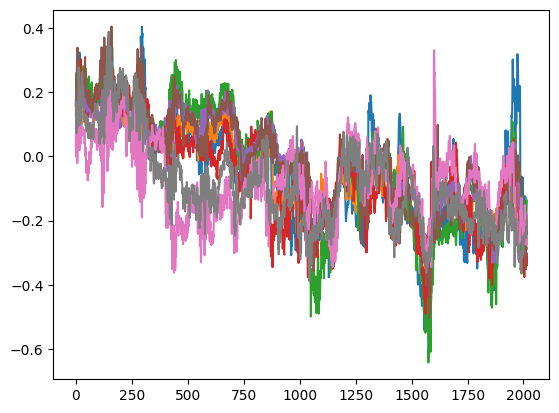

In [16]:
for idx in range(train_data_bru["Y"][:,0].shape[0]):
    print(idx)
    plt.plot(train_data_bru["V"][idx,:])
plt.show()

4


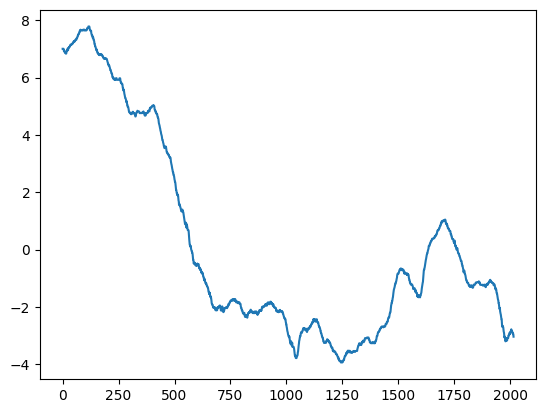

In [9]:
idx = np.random.randint(0, train_data_bru["Y"][:,0].shape[0], 1)[0]
print(idx)
plt.plot(train_data_bru["P"][idx,:])
plt.show()

# Co

In [3]:
# data_path = Path().cwd().parent / "data" / "raw" / "em_cundinamarca_boyaca_251201_251231.parquet"
data_path = Path().cwd().parent / "data" / "raw" / "em_cundinamarca_boyaca_251201_251231_11ws_interpo.parquet"
process_data_co = ProcessDataColombia(data_path)
process_data_co.load_data()

kwargs = {
    # "R":0.15,
    # "n_days":14,
    "interval":1,
    "WS_val_idx": np.array([2, 3])}
    # "WS_val_idx": np.array([1, 2, 3, 5, 7, 9, 10, 11, 13, 14, 15, 16, 19])

process_data_co.process_data(**kwargs)


Iniciando carga de /home/alejandro/pinns/data/raw/em_cundinamarca_boyaca_251201_251231_11ws_interpo.parquet
Documento cargado en 0:00:00.075875 s.
--- Coordenadas Cartesianas y Proyecciones ---
--- OK ---
--- Eliminar NaNs ---
--- OK ---
--- Selección de días y ordenamiento por coor ---
---> Se registran 30.0 días de registros
---> 31 selected days
---> Interval of 20.0 min
--- OK ---
--- Centrado y creación de la malla ---
---> L: 250862.10, W: 10.10, P0: 73482.75, Re: 183321297984 --
#	self.X_PINN.shape=(65, 2230)	self.Y_PINN.shape=(65, 2230)	#
#	np.nanmin(self.T_WS)=0.000e+00	np.nanmax(self.T_WS)=1.077e+02	#
#	np.nanmin(self.P_WS)=-1.702e+01	np.nanmax(self.P_WS)=2.095e+01	#
#	np.nanmin(self.U_WS)=-5.816e-01	np.nanmax(self.U_WS)=7.704e-01	#
#	np.nanmin(self.V_WS)=-6.376e-01	np.nanmax(self.V_WS)=5.205e-01	#
#	np.nanmin(self.X_WS)=-1.222e-01	np.nanmax(self.X_WS)=1.222e-01	#
#	np.nanmin(self.Y_WS)=-4.848e-01	np.nanmax(self.Y_WS)=4.848e-01	#
--- OK ---
--- Separar entre validación y entr

In [4]:
train_data_co, val_data_co, pinn_grid_co, params_co = process_data_co.return_data()

In [5]:
train_data_co["Y"][:,0]

array([-0.48483085, -0.11408396,  0.11398126,  0.09454107,  0.05742415,
        0.20497791,  0.18686942,  0.39525982,  0.48483085])

In [6]:
train_data_co["U"].size

20070

In [7]:
np.isnan(train_data_co["U"]).sum()

np.int64(0)

0
1
2
3
4
5
6
7
8


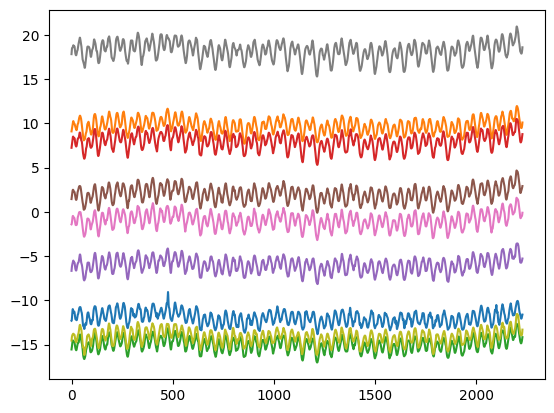

In [18]:
for idx in range(train_data_co["Y"][:,0].shape[0]):
    print(idx)
    # print(train_data_co["X"][idx,0] , train_data_co["Y"][idx,0])
    plt.plot(train_data_co["P"][idx,:])
plt.show()

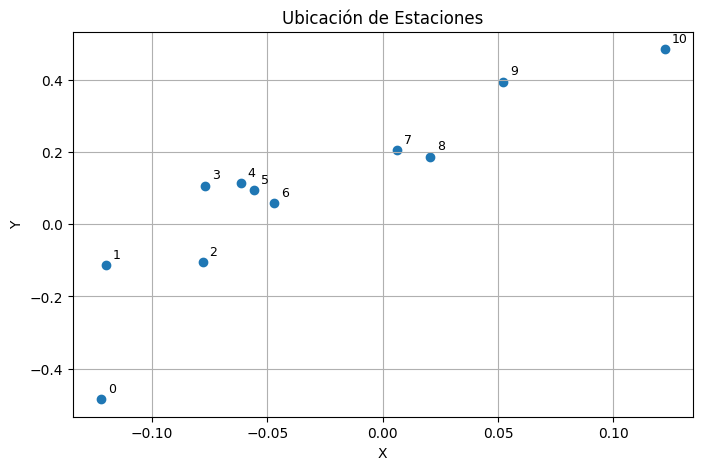

In [19]:
process_data_co.plot_estacion()

0
1
2
3
4
5
6
7
8


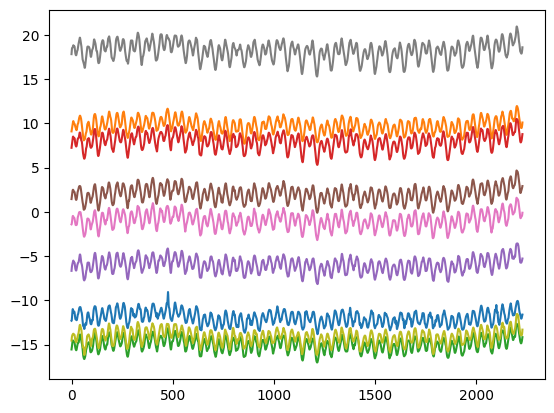

In [20]:
for idx in range(train_data_co["Y"][:,0].shape[0]):
    print(idx)
    # print(train_data_co["X"][idx,0] , train_data_co["Y"][idx,0])
    plt.plot(train_data_co["P"][idx,:])
plt.show()

In [29]:
train_data_co.keys()

dict_keys(['T', 'X', 'Y', 'U', 'V', 'P'])

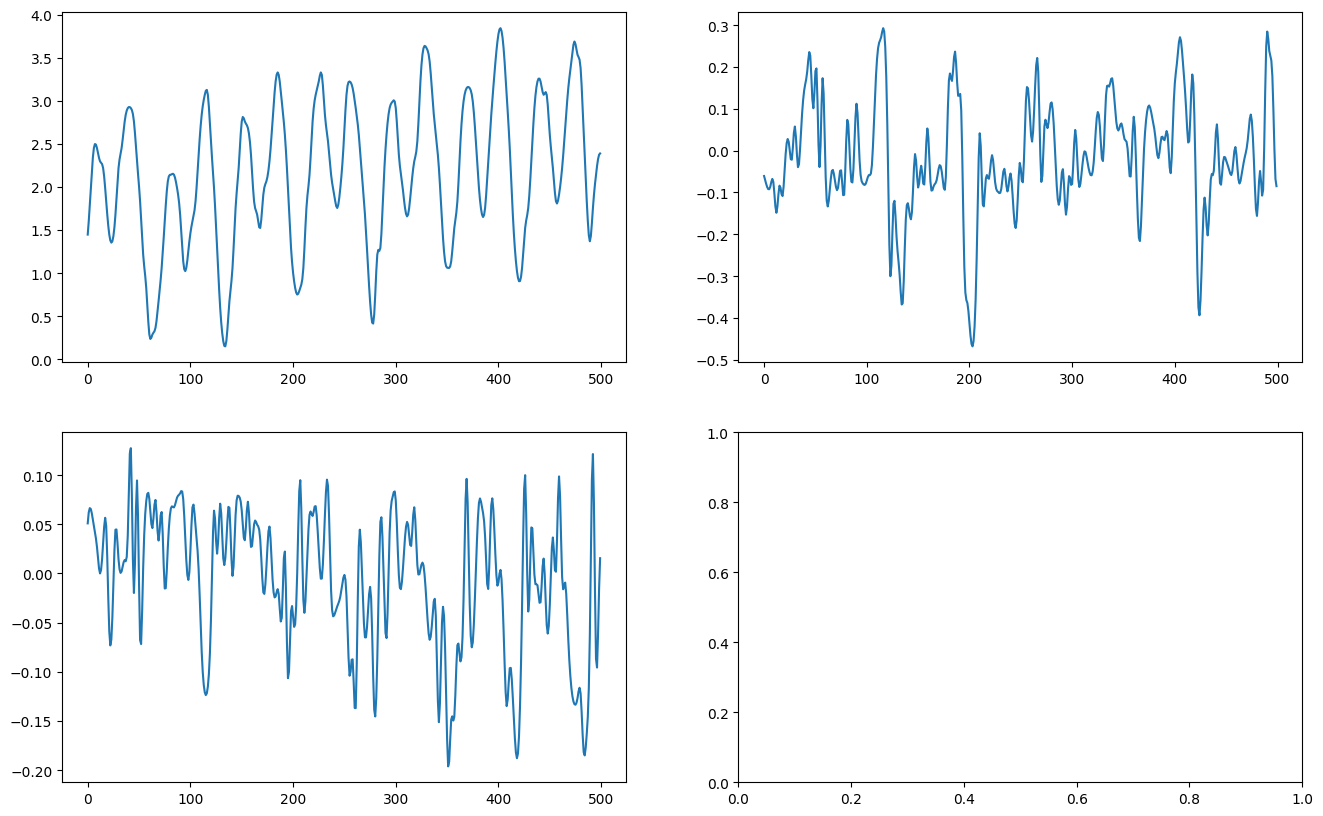

In [23]:
idx = 5
fig , ax = plt.subplots(2, 2, figsize=(16, 10))
ax[0,0].plot(train_data_co["P"][idx,:500])
ax[0,1].plot(train_data_co["U"][idx,:500])
ax[1,0].plot(train_data_co["V"][idx,:500])
plt.show()

In [187]:
train_data_co["X"][13]

array([0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948806,
       0.05948806, 0.05948806, 0.05948806, 0.05948806, 0.05948